In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [2]:
scored_test_data = pd.read_csv('scored_test_data.csv', index_col=0)
scored_train_data = pd.read_csv('scored_train_data.csv', index_col=0)

## Dummy variables

In [3]:
dummies_category_test = pd.get_dummies(scored_test_data['Category'])
dummies_badges_test = scored_test_data['Badges'].str.strip('{}').str.replace('"', '').str.get_dummies(',')

dummies_category_train = pd.get_dummies(scored_train_data['Category'])
dummies_badges_train = scored_train_data['Badges'].str.strip('{}').str.replace('"', '').str.get_dummies(',')

In [40]:
dropped_cols_test = scored_test_data.drop(['Category','Badges'], axis = 1)

dropped_cols_train = scored_train_data.drop(['Category','Badges'], axis = 1)

In [41]:
complete_test_data = pd.concat([dropped_cols_test,dummies_badges_test, dummies_category_test], axis = 1)

complete_train_data = pd.concat([dropped_cols_train,dummies_badges_train, dummies_category_train], axis = 1)

In [42]:
col_interactions_test = complete_test_data.pop('interaction')
col_interactions_train = complete_train_data.pop('interaction')


complete_test_data.insert(len(complete_test_data.columns), 'interaction', col_interactions_test)
complete_train_data.insert(len(complete_train_data.columns), 'interaction', col_interactions_train)

In [43]:
complete_test_data = complete_test_data.dropna()
complete_train_data = complete_train_data.dropna()

In [8]:
complete_test_data.to_csv('scored_test_data_wth_dummies.csv')
complete_train_data.to_csv('scored_train_data_wth_dummies.csv')

# Distribution

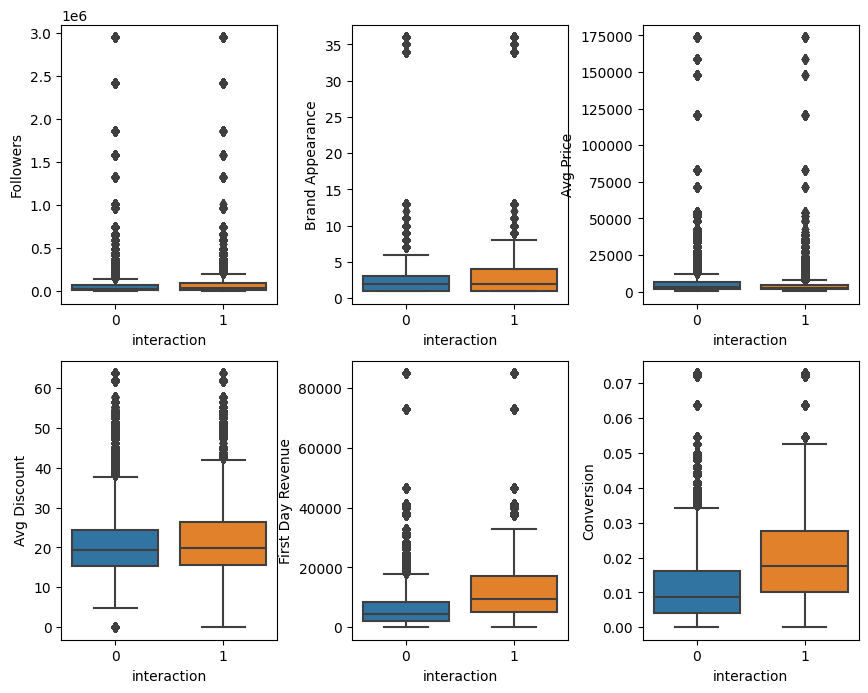

In [9]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(9,7))
fig.tight_layout(pad=2)

for i, col in enumerate(dropped_cols_train.columns[3:-4]):
    sns.boxplot(y = col, x = "interaction",data=dropped_cols_train, orient='v', ax=axes[int(i/3),i%3])

## Distribution

In [10]:
target = 'interaction'

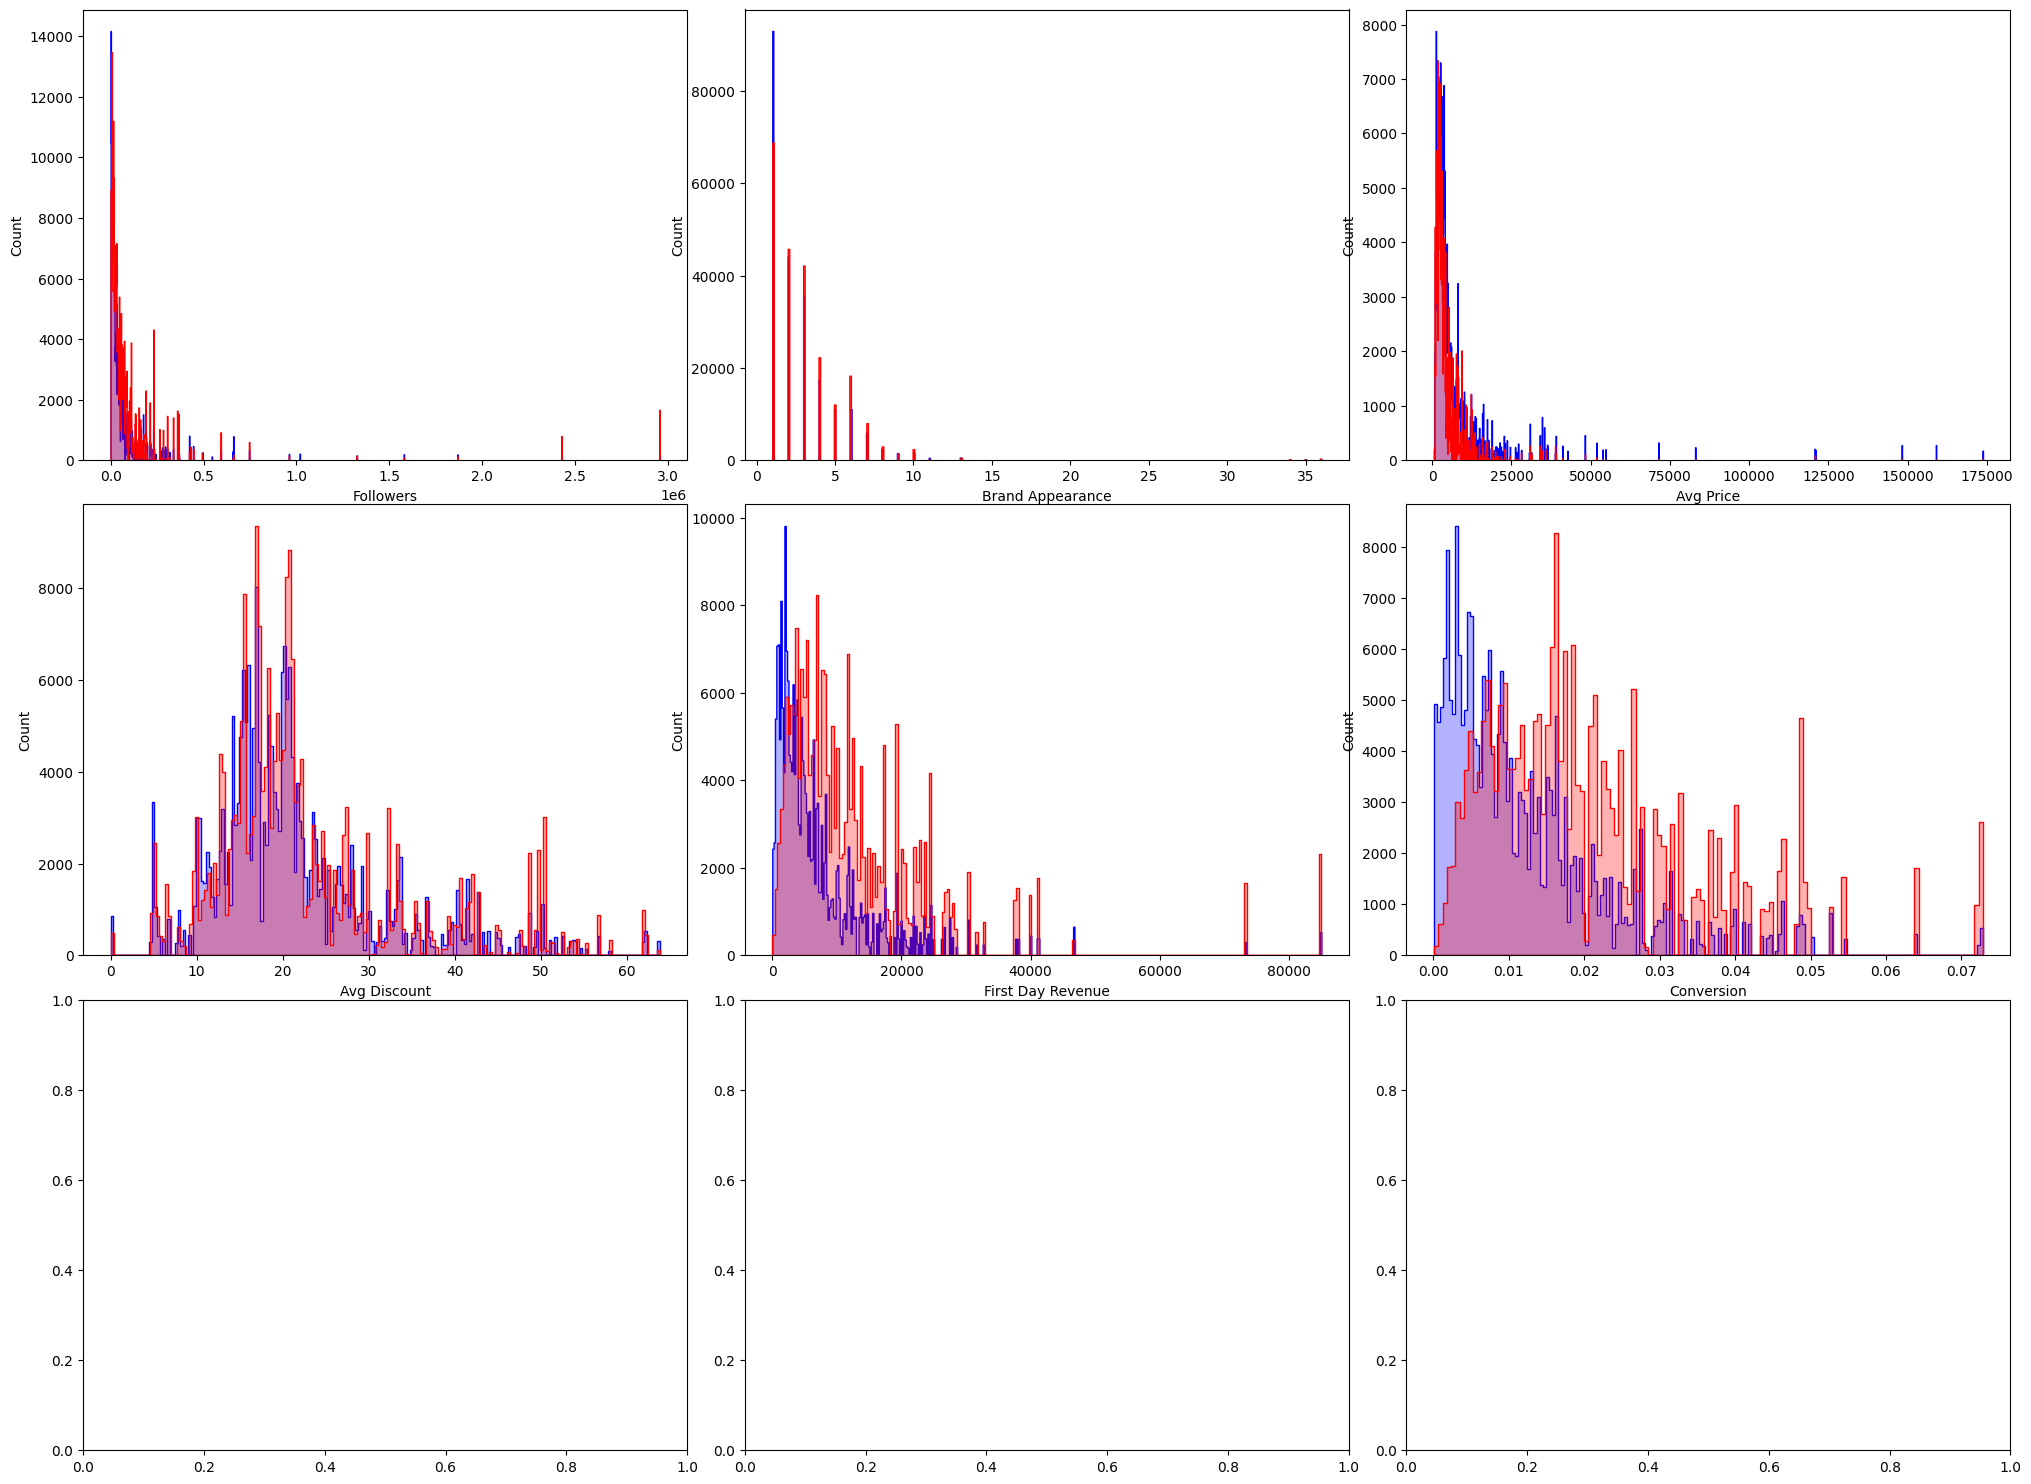

In [11]:
X= complete_train_data

X0 = X[X[target]==0]
X1 = X[X[target]==1]

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20,15))
fig.tight_layout()

for i, ax in zip(range(3,9), axes.flat):
    sns.histplot((X0.iloc[:,i]), color="blue", element="step", ax=ax,  alpha=0.3) #alpha is transparency!
    sns.histplot((X1.iloc[:,i]), color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

## Transformation de décrément logarithmique

In [98]:
def adding_log(train: pd.DataFrame, test: pd.DataFrame, columns_to_log: list):
    """ 
    Adding columns using log of provided information.
    """
    new_train = train.__deepcopy__()
    new_test = test.__deepcopy__()
    for column_name in columns_to_log:
        new_position = train.columns.get_loc(str(column_name)) + 1
        new_name = str ('log_' + str(column_name))
        new_train.insert(new_position, new_name, np.log(new_train[str(column_name)] + 1))
        new_test.insert(new_position, new_name, np.log(new_test[str(column_name)] + 1 ))
        new_train = new_train.drop(str(column_name), axis='columns')
        new_test = new_test.drop(str(column_name), axis='columns')
        
    return (new_train, new_test)
    

In [99]:
log_columns = ['Followers', 'Avg Price', 'First Day Revenue', 'Brand Appearance']
post_prep_train_data, post_prep_test_data = adding_log(complete_train_data, 
                                                       complete_test_data,
                                                       log_columns)

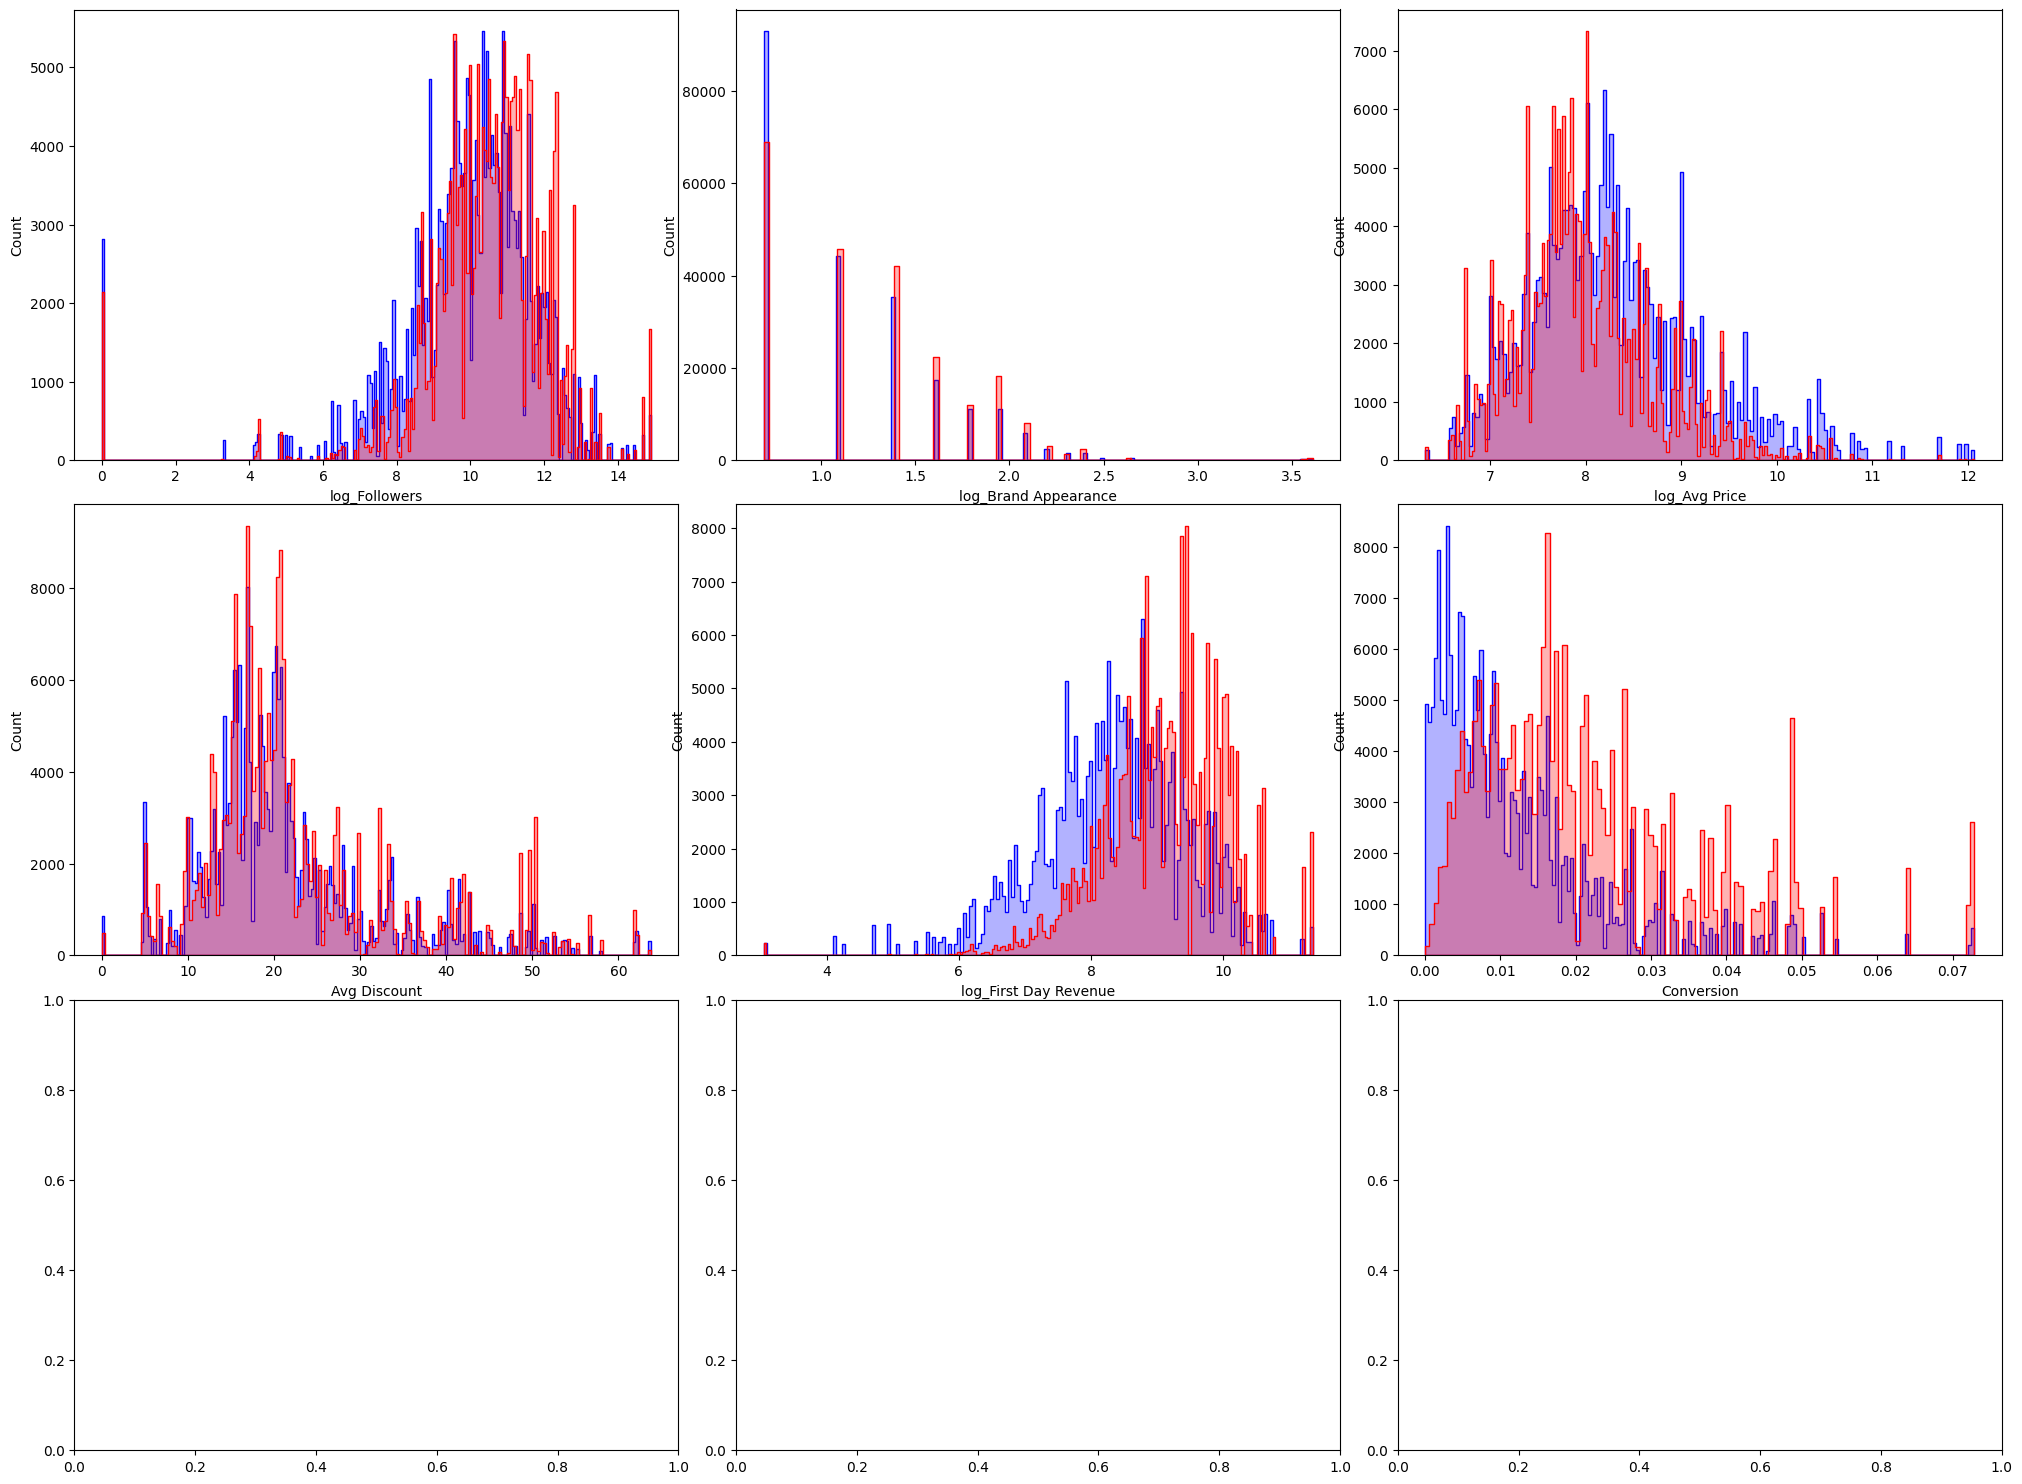

In [100]:
X= post_prep_train_data

X0 = X[X[target]==0]
X1 = X[X[target]==1]

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20,15))
fig.tight_layout()

for i, ax in zip(range(3,9), axes.flat):
    sns.histplot((X0.iloc[:,i]), color="blue", element="step", ax=ax,  alpha=0.3) #alpha is transparency!
    sns.histplot((X1.iloc[:,i]), color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

## Scalling

In [101]:
def scale(train: pd.DataFrame, test: pd.DataFrame, numerical_columns: list):
    """
    Returns dataframe with the given columns scaled.
    """
    new_train = train.__deepcopy__()
    new_test = test.__deepcopy__()

    num_train_data = new_train[numerical_columns]
    num_test_data = new_test[numerical_columns]

    scaler = StandardScaler()
    scaler.fit(num_train_data)

    new_train[numerical_columns] = scaler.transform(num_train_data)
    new_test[numerical_columns] = scaler.transform(num_test_data)

    return (new_train, new_test)



In [102]:
num_columns = ['log_Followers',
               'log_Avg Price',
               'log_First Day Revenue',
               'log_Brand Appearance',
               'Avg Discount',
               'Conversion']
scaled_train_data, scaled_test_data = scale(post_prep_train_data,
                                            post_prep_test_data,
                                            num_columns)

In [103]:
np.where(np.isinf(post_prep_train_data[num_columns]))

(array([], dtype=int64), array([], dtype=int64))

<Axes: >

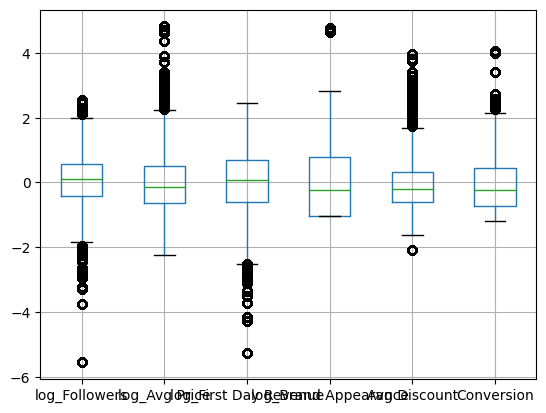

In [104]:
scaled_train_data[num_columns].boxplot()

In [105]:
scaled_train_data.to_csv('preped_test_data_wth_dummies.csv')
scaled_test_data.to_csv('preped_train_data_wth_dummies.csv')

In [106]:
scaled_train_data

,User Key,Sale ID,Start At,log_Followers,log_Brand Appearance,log_Avg Price,Avg Discount,log_First Day Revenue,Conversion,Recency,...,Hygiène,Kids,Lingerie,Maroquinerie,Outdoor,Prêt-à-porter,Salon,Soins,Sportswear,interaction
0,fm1she7jfjdB2Lw3S4vJEJGgehD2,d2391be44951420f96937ff76,2023-04-02,-0.165948,0.338140,-0.948641,-0.241303,0.436664,0.443769,0,...,0,0,0,0,0,0,0,0,0,1
1,fm1she7jfjdB2Lw3S4vJEJGgehD2,1c27d7a039624daa94c557819,2023-04-02,-0.149214,-1.041318,1.895850,-0.065291,0.290797,-0.929639,0,...,0,0,0,0,0,0,0,0,0,0
2,xHHRJERYexaPADNb777I67UGUPr1,0e40e4bc87814220b76f44652,2023-02-26,-0.825485,0.782226,0.525141,-0.353015,1.260695,0.136963,32,...,0,0,0,0,0,0,0,0,0,1
3,xHHRJERYexaPADNb777I67UGUPr1,0e40e4bc87814220b76f44652,2023-02-26,-0.825485,0.782226,0.525141,-0.353015,1.260695,0.136963,32,...,0,0,0,0,0,0,0,0,0,0
4,jX31PvDAFSaAcYohqXvXjVioB6l1,70bdbc0938514dada1bb08a18,2023-01-21,0.490260,1.717597,-1.282269,-0.185234,0.782570,0.723547,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451993,YDl5ixKMKqQnv0aVadzse417EA62,378a89864a9645c1a26ecb34e,2023-04-02,-1.254427,-1.041318,-0.861378,0.721064,-0.284705,0.850236,0,...,0,0,0,0,0,0,0,0,0,0
451994,ATYi0s6s8MXK0CYUXyrjuquCGyK2,8412c3a98f2f4f439300256c9,2023-03-21,0.438108,-1.041318,-0.926563,-0.444770,1.401401,0.590845,12,...,0,0,0,0,0,0,0,0,0,1
451995,ATYi0s6s8MXK0CYUXyrjuquCGyK2,ad4f04dd07114ef787f2a8172,2023-03-21,0.369556,0.338140,1.255613,-0.446733,0.576577,-0.867001,12,...,0,0,0,0,0,1,0,0,0,0
451996,fAXmOv8r8SO6te0PzjkQp6ROrUp1,2c03339a3ba54aeba2084c852,2023-01-03,-0.498018,1.952002,0.227080,-0.118254,1.376404,1.767170,30,...,1,0,0,0,0,0,0,0,0,1
